## Mall Customer Segmentation using KMeans

## 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import random
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style ="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## 2. Reading and Importing the datasets

In [2]:
with open('/content/segment_mall_data.txt','r') as f:
    rows=f.read().split('\n')

## 3. Preparatory Data Analysis

In [3]:
len(rows)

2002

In [4]:
rows[0]

'"ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size"'

In [5]:
len(rows)

2002

## 4. Adding score and index columns with random data

In [6]:
# arr_items=range(1,50)
arr_items=[random.randint(0,100) for i in range(0,2000)]
print(arr_items)
print(len(arr_items))
print(len(set(arr_items)))
new_items=set(arr_items)
new_list=list(new_items)
random.shuffle(new_list)
print(len(new_list))
print(new_list)

[82, 87, 57, 23, 97, 18, 7, 72, 89, 34, 19, 66, 96, 35, 72, 14, 3, 54, 62, 6, 24, 46, 67, 60, 29, 23, 12, 8, 52, 45, 91, 9, 81, 83, 27, 80, 84, 52, 11, 62, 15, 58, 19, 63, 29, 64, 2, 22, 59, 80, 27, 2, 5, 61, 46, 51, 54, 32, 46, 20, 51, 51, 31, 21, 75, 43, 27, 66, 70, 78, 36, 25, 34, 37, 86, 36, 5, 100, 52, 43, 35, 32, 43, 13, 25, 79, 20, 71, 39, 88, 81, 73, 50, 100, 76, 38, 75, 34, 48, 84, 2, 80, 88, 67, 55, 75, 14, 79, 57, 2, 0, 22, 3, 90, 97, 27, 62, 91, 66, 90, 23, 91, 1, 42, 37, 61, 97, 20, 25, 56, 33, 13, 78, 63, 18, 66, 100, 52, 86, 43, 28, 5, 27, 45, 61, 75, 39, 15, 3, 6, 2, 27, 25, 26, 13, 44, 98, 61, 89, 10, 32, 44, 38, 35, 71, 29, 63, 15, 74, 87, 29, 99, 47, 80, 100, 50, 16, 67, 47, 68, 21, 34, 70, 77, 74, 26, 87, 88, 95, 77, 82, 29, 93, 0, 14, 78, 78, 100, 71, 8, 11, 10, 41, 98, 39, 1, 50, 28, 11, 49, 56, 80, 7, 94, 76, 31, 58, 13, 59, 30, 57, 17, 25, 57, 52, 64, 89, 42, 62, 93, 2, 62, 79, 77, 68, 90, 57, 59, 50, 62, 28, 39, 67, 18, 25, 93, 33, 22, 93, 75, 37, 44, 32, 61, 4

In [7]:
arr_income=[]
arr_id=[]
for row in rows[1:2001]:
  arr_income.append(row.split(',')[5])
  arr_id.append(row.split(',')[5])
print(len(arr_income))
print(len(arr_id))

2000
2000


In [8]:
arr_sex=[]
for row in rows[1:2001]:
  arr_sex.append(row.split(',')[1])
print(len(arr_sex))

2000


## 5. Score calculation and unique data exploration

In [9]:
def calculate_score(arr_item):
  arr_score=[]
  score=0
  for i in arr_item:
    if(i<10):
      score=random.randint(0,5)
    elif(i>10 and i<30):
      score=random.randint(5,10)
    elif(i>30 and i<50):
      score=random.randint(10,15)
    elif(i>50 and i<65):
      score=random.randint(15,30)
    elif(i>65 and i<70):
      score=random.randint(30,50)
    elif(i>70 and i<80):
      score=random.randint(50,70)
    elif(i>80 and i<90):
      score=random.randint(70,85)
    else:
      score=random.randint(85,100)
    arr_score.append(score)
  return arr_score

In [10]:
print(arr_items)
print(len(new_list))
arr_score=calculate_score(new_list)
arr_nonunique_score=calculate_score(arr_items)
print(len(arr_score))
print(len(arr_nonunique_score))

[82, 87, 57, 23, 97, 18, 7, 72, 89, 34, 19, 66, 96, 35, 72, 14, 3, 54, 62, 6, 24, 46, 67, 60, 29, 23, 12, 8, 52, 45, 91, 9, 81, 83, 27, 80, 84, 52, 11, 62, 15, 58, 19, 63, 29, 64, 2, 22, 59, 80, 27, 2, 5, 61, 46, 51, 54, 32, 46, 20, 51, 51, 31, 21, 75, 43, 27, 66, 70, 78, 36, 25, 34, 37, 86, 36, 5, 100, 52, 43, 35, 32, 43, 13, 25, 79, 20, 71, 39, 88, 81, 73, 50, 100, 76, 38, 75, 34, 48, 84, 2, 80, 88, 67, 55, 75, 14, 79, 57, 2, 0, 22, 3, 90, 97, 27, 62, 91, 66, 90, 23, 91, 1, 42, 37, 61, 97, 20, 25, 56, 33, 13, 78, 63, 18, 66, 100, 52, 86, 43, 28, 5, 27, 45, 61, 75, 39, 15, 3, 6, 2, 27, 25, 26, 13, 44, 98, 61, 89, 10, 32, 44, 38, 35, 71, 29, 63, 15, 74, 87, 29, 99, 47, 80, 100, 50, 16, 67, 47, 68, 21, 34, 70, 77, 74, 26, 87, 88, 95, 77, 82, 29, 93, 0, 14, 78, 78, 100, 71, 8, 11, 10, 41, 98, 39, 1, 50, 28, 11, 49, 56, 80, 7, 94, 76, 31, 58, 13, 59, 30, 57, 17, 25, 57, 52, 64, 89, 42, 62, 93, 2, 62, 79, 77, 68, 90, 57, 59, 50, 62, 28, 39, 67, 18, 25, 93, 33, 22, 93, 75, 37, 44, 32, 61, 4

In [11]:
df=pd.DataFrame()
df['Income']=arr_income
df['Purchase_Score']=arr_nonunique_score
df['Sex']=arr_sex

In [12]:
print(df['Income'].shape)
print(df['Purchase_Score'].shape)

(2000,)
(2000,)


In [13]:
unique_purchase_score=arr_score
print(len(unique_purchase_score))
print(df['Purchase_Score'].unique().shape)

101
(100,)


In [14]:
nunique_purchase_score=arr_nonunique_score
fin_index=[]
for j in unique_purchase_score:
  if(unique_purchase_score[j] in nunique_purchase_score):
     fin_index.append(nunique_purchase_score.index(unique_purchase_score[j]))
print(len(fin_index))

101


In [15]:
unique_income=[]
unique_id=[]
for i in range(len(fin_index)):
  unique_income.append(arr_income[fin_index[i]])
  unique_id.append(arr_id[fin_index[i]])
print(len(unique_income))
print(len(unique_id))

101
101


In [16]:
fin_df=pd.DataFrame()
fin_df['ID']=unique_id
fin_df['Income']=unique_income
fin_df['Purchase_Score']=unique_purchase_score
fin_df.shape

(101, 3)

## 6. Data visualization and plotting

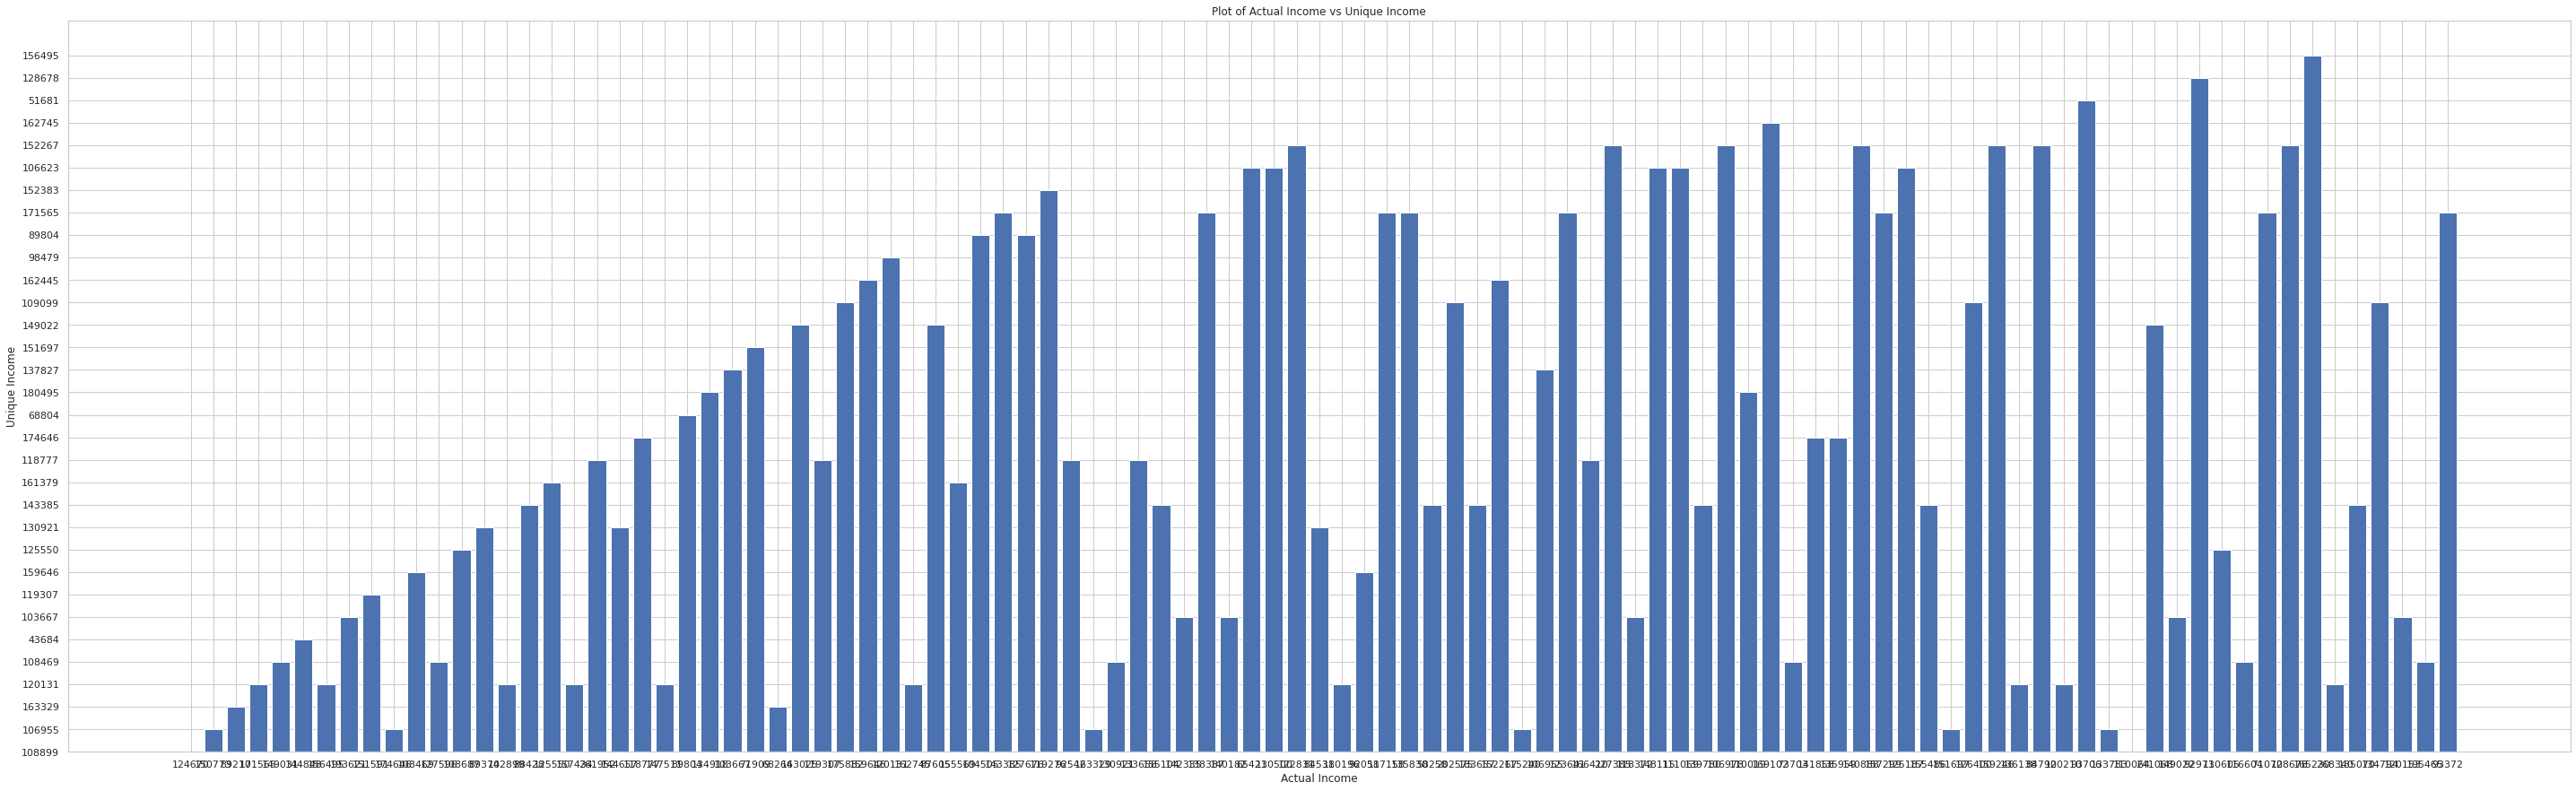

In [17]:
plt.figure(figsize=(50, 15))
plt.bar(arr_income[0:101],unique_income)
plt.title('Plot of Actual Income vs Unique Income')
plt.xlabel('Actual Income')
plt.ylabel('Unique Income')
plt.savefig('Plot A')
plt.show()

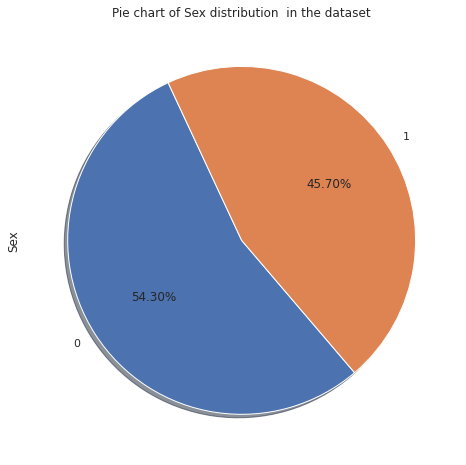

In [18]:
plt.figure(figsize=(8,8))
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,startangle=115)
plt.title('Pie chart of Sex distribution  in the dataset')
plt.savefig('Plot B')
plt.show()

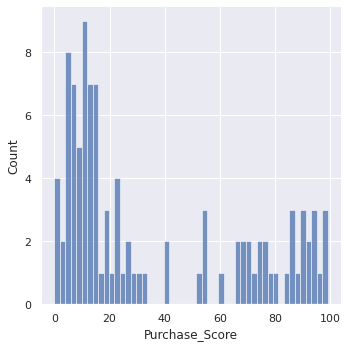

In [19]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.displot(fin_df['Purchase_Score'],bins=50)
plt.savefig('Plot C')
plt.show()

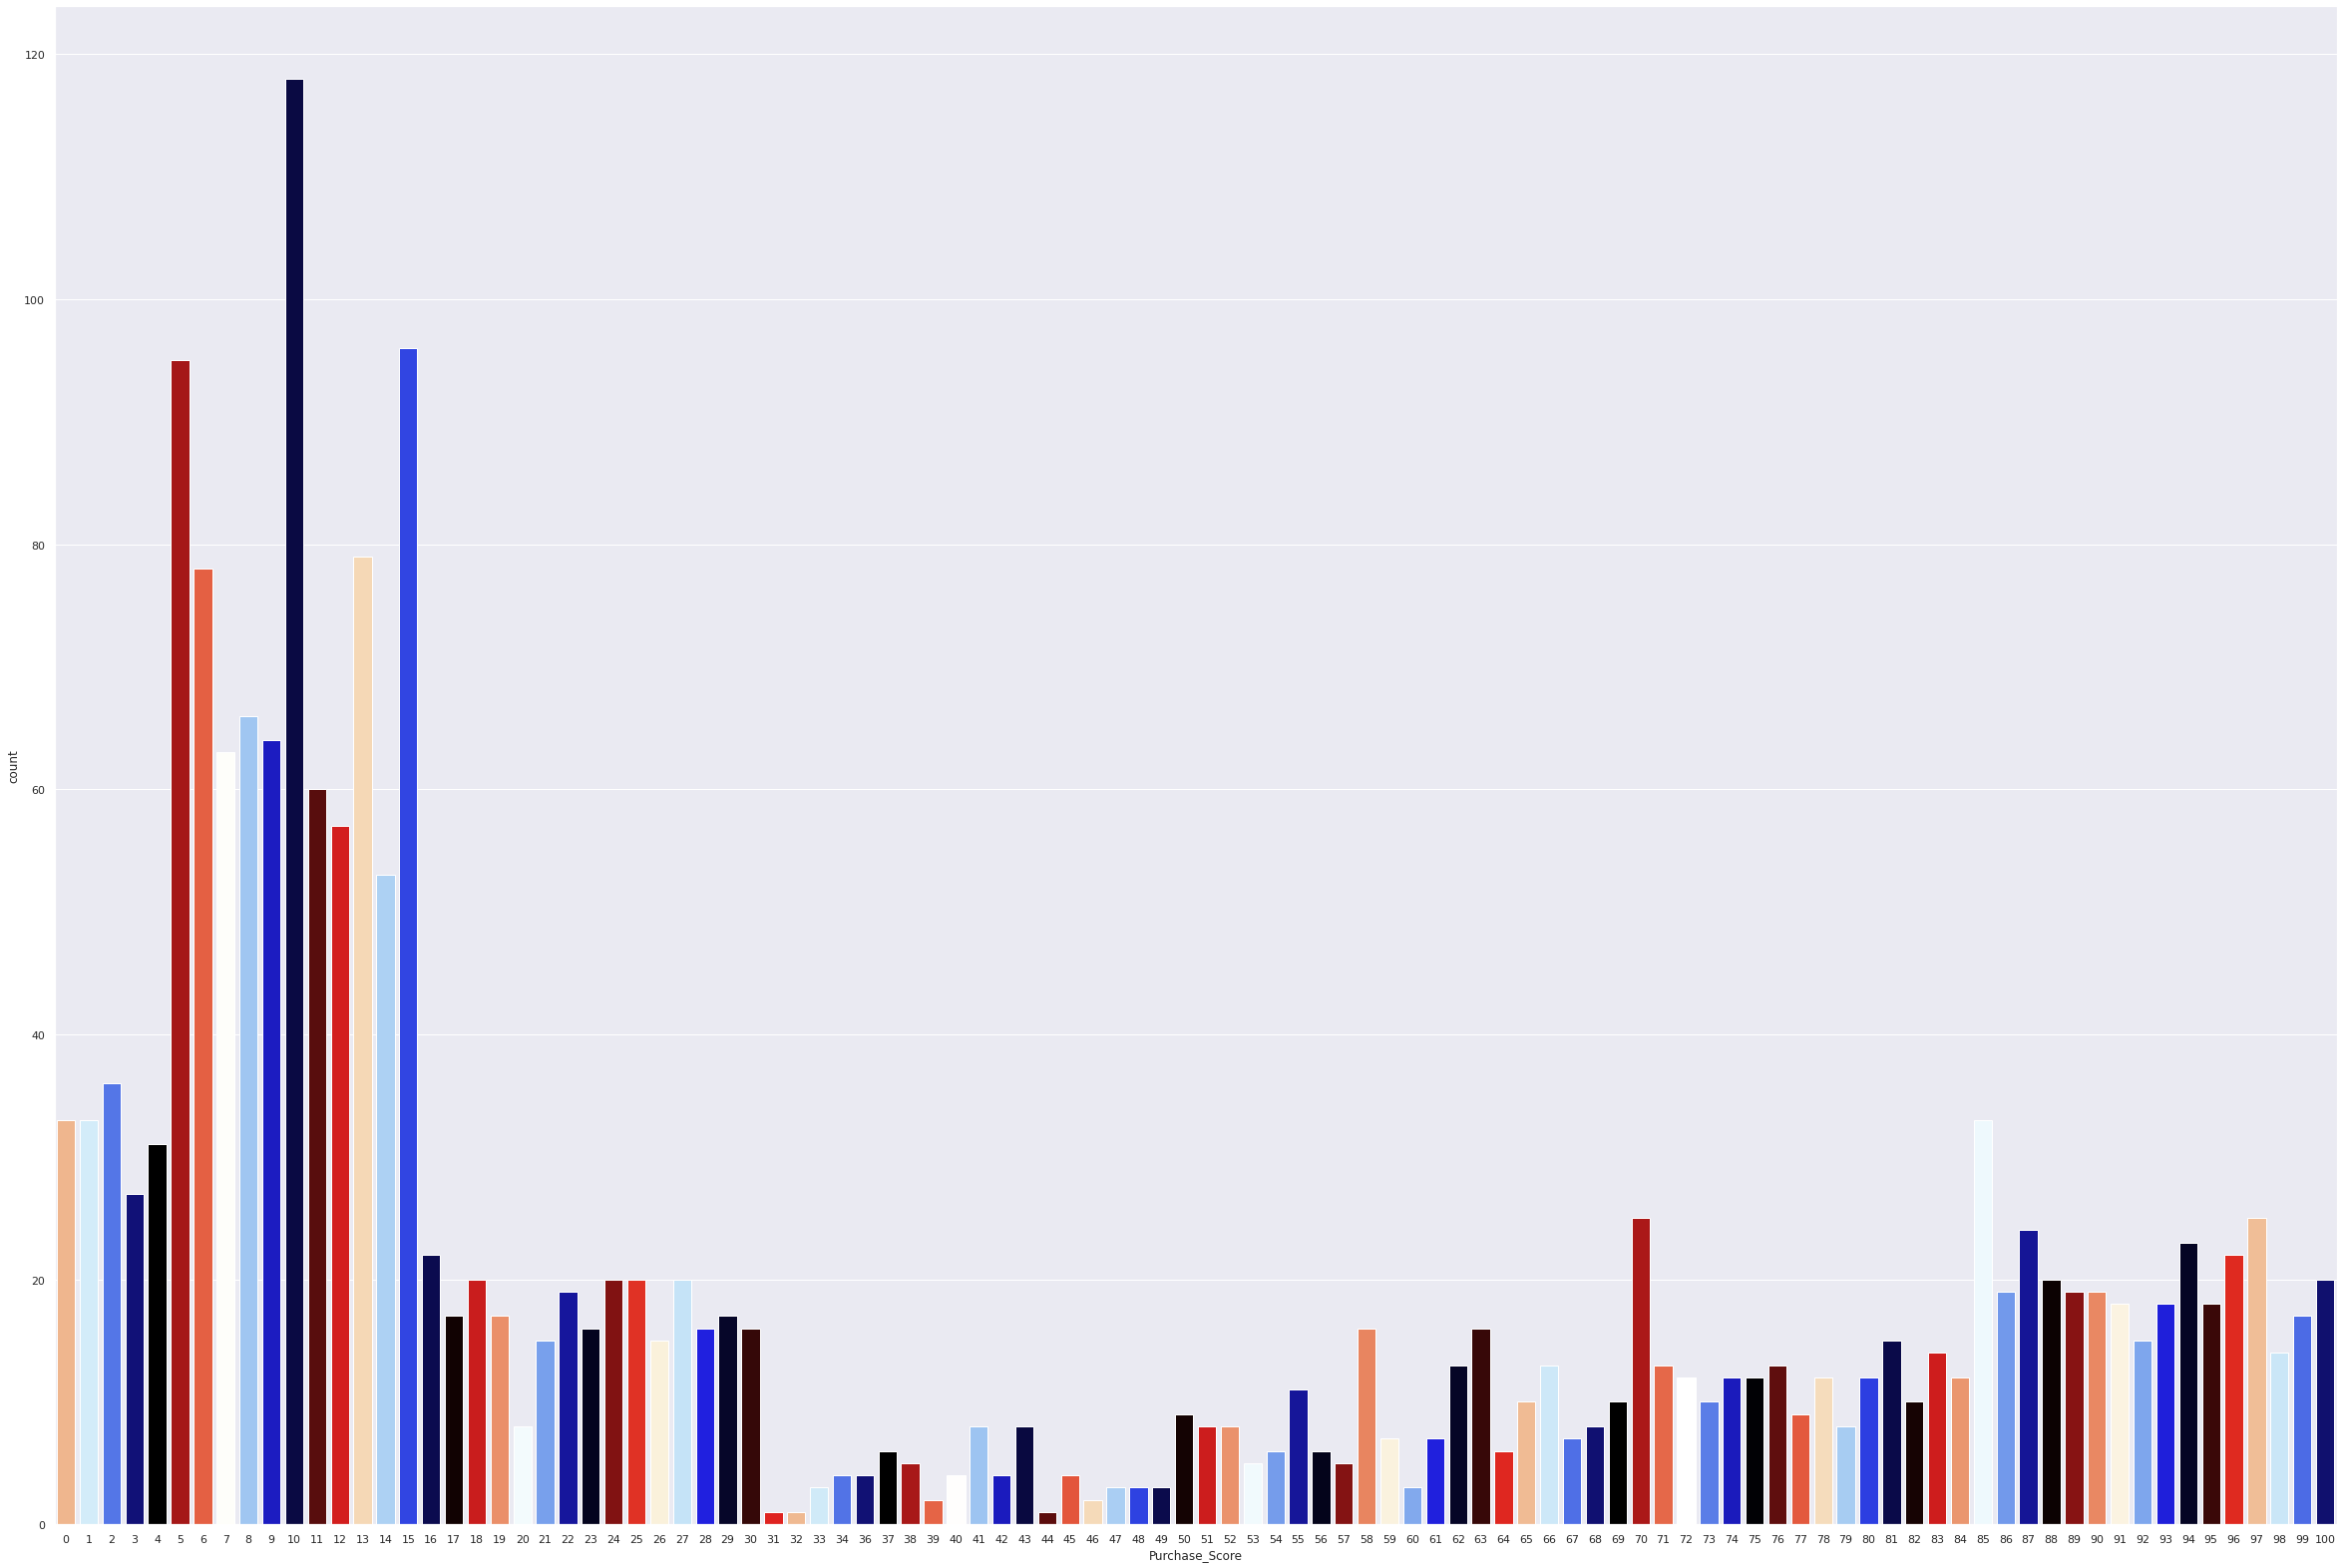

In [20]:
sns.set(rc={'figure.figsize':(41, 28)})
sns.countplot(x='Purchase_Score', data=df,palette='flag')
plt.savefig('Plot D')
plt.show()

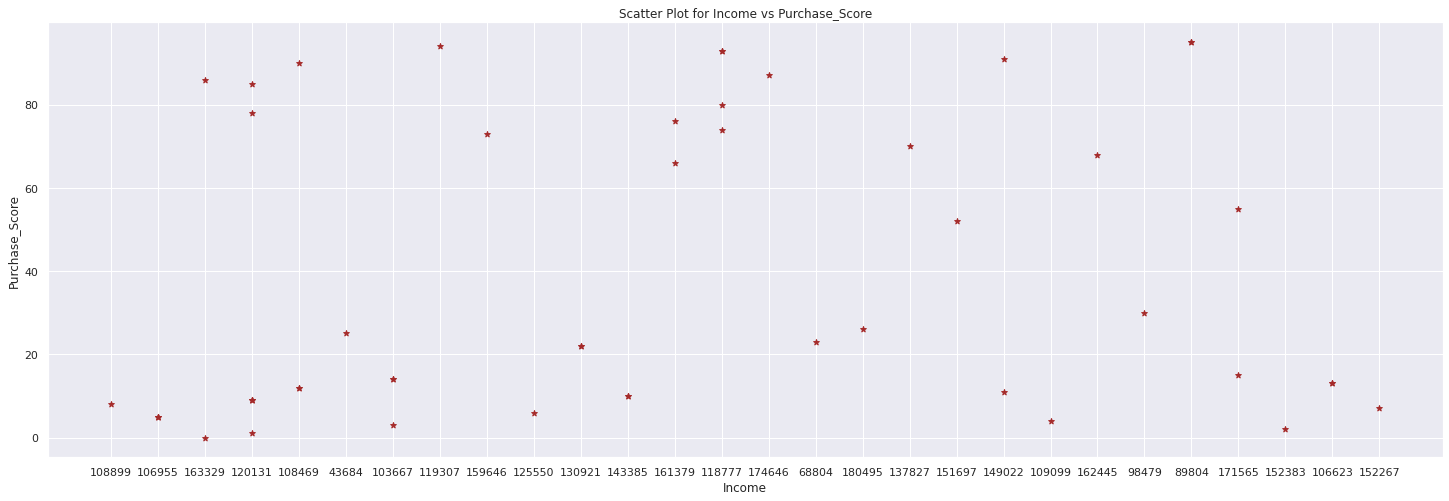

In [21]:
plt.figure(figsize=(25,8))
plt.scatter(fin_df[0:50]['Income'],fin_df[0:50]['Purchase_Score'],marker='*',color='brown')
plt.title('Scatter Plot for Income vs Purchase_Score')
plt.xlabel('Income')
plt.ylabel('Purchase_Score')
plt.savefig('Plot E')
plt.show()

In [22]:
print(fin_df['Income'].shape)

(101,)


## 7. Clustering with KMeans Algorithm

In [23]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [24]:
y_pred=km.fit_predict(fin_df[['Income','Purchase_Score']])
y_pred

array([0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

In [25]:
fin_df['Clusters']=y_pred
fin_df

,ID,Income,Purchase_Score,Clusters
0,108899,108899,8,0
1,106955,106955,5,0
2,163329,163329,0,1
3,120131,120131,9,0
4,108469,108469,90,0
...,...,...,...,...
96,143385,143385,10,1
97,109099,109099,99,0
98,103667,103667,14,0
99,108469,108469,90,0


In [26]:
df0=fin_df[fin_df.Clusters==0]
df1=fin_df[fin_df.Clusters==1]
df2=fin_df[fin_df.Clusters==2]
# df3=fin_df[fin_df.Clusters==3]

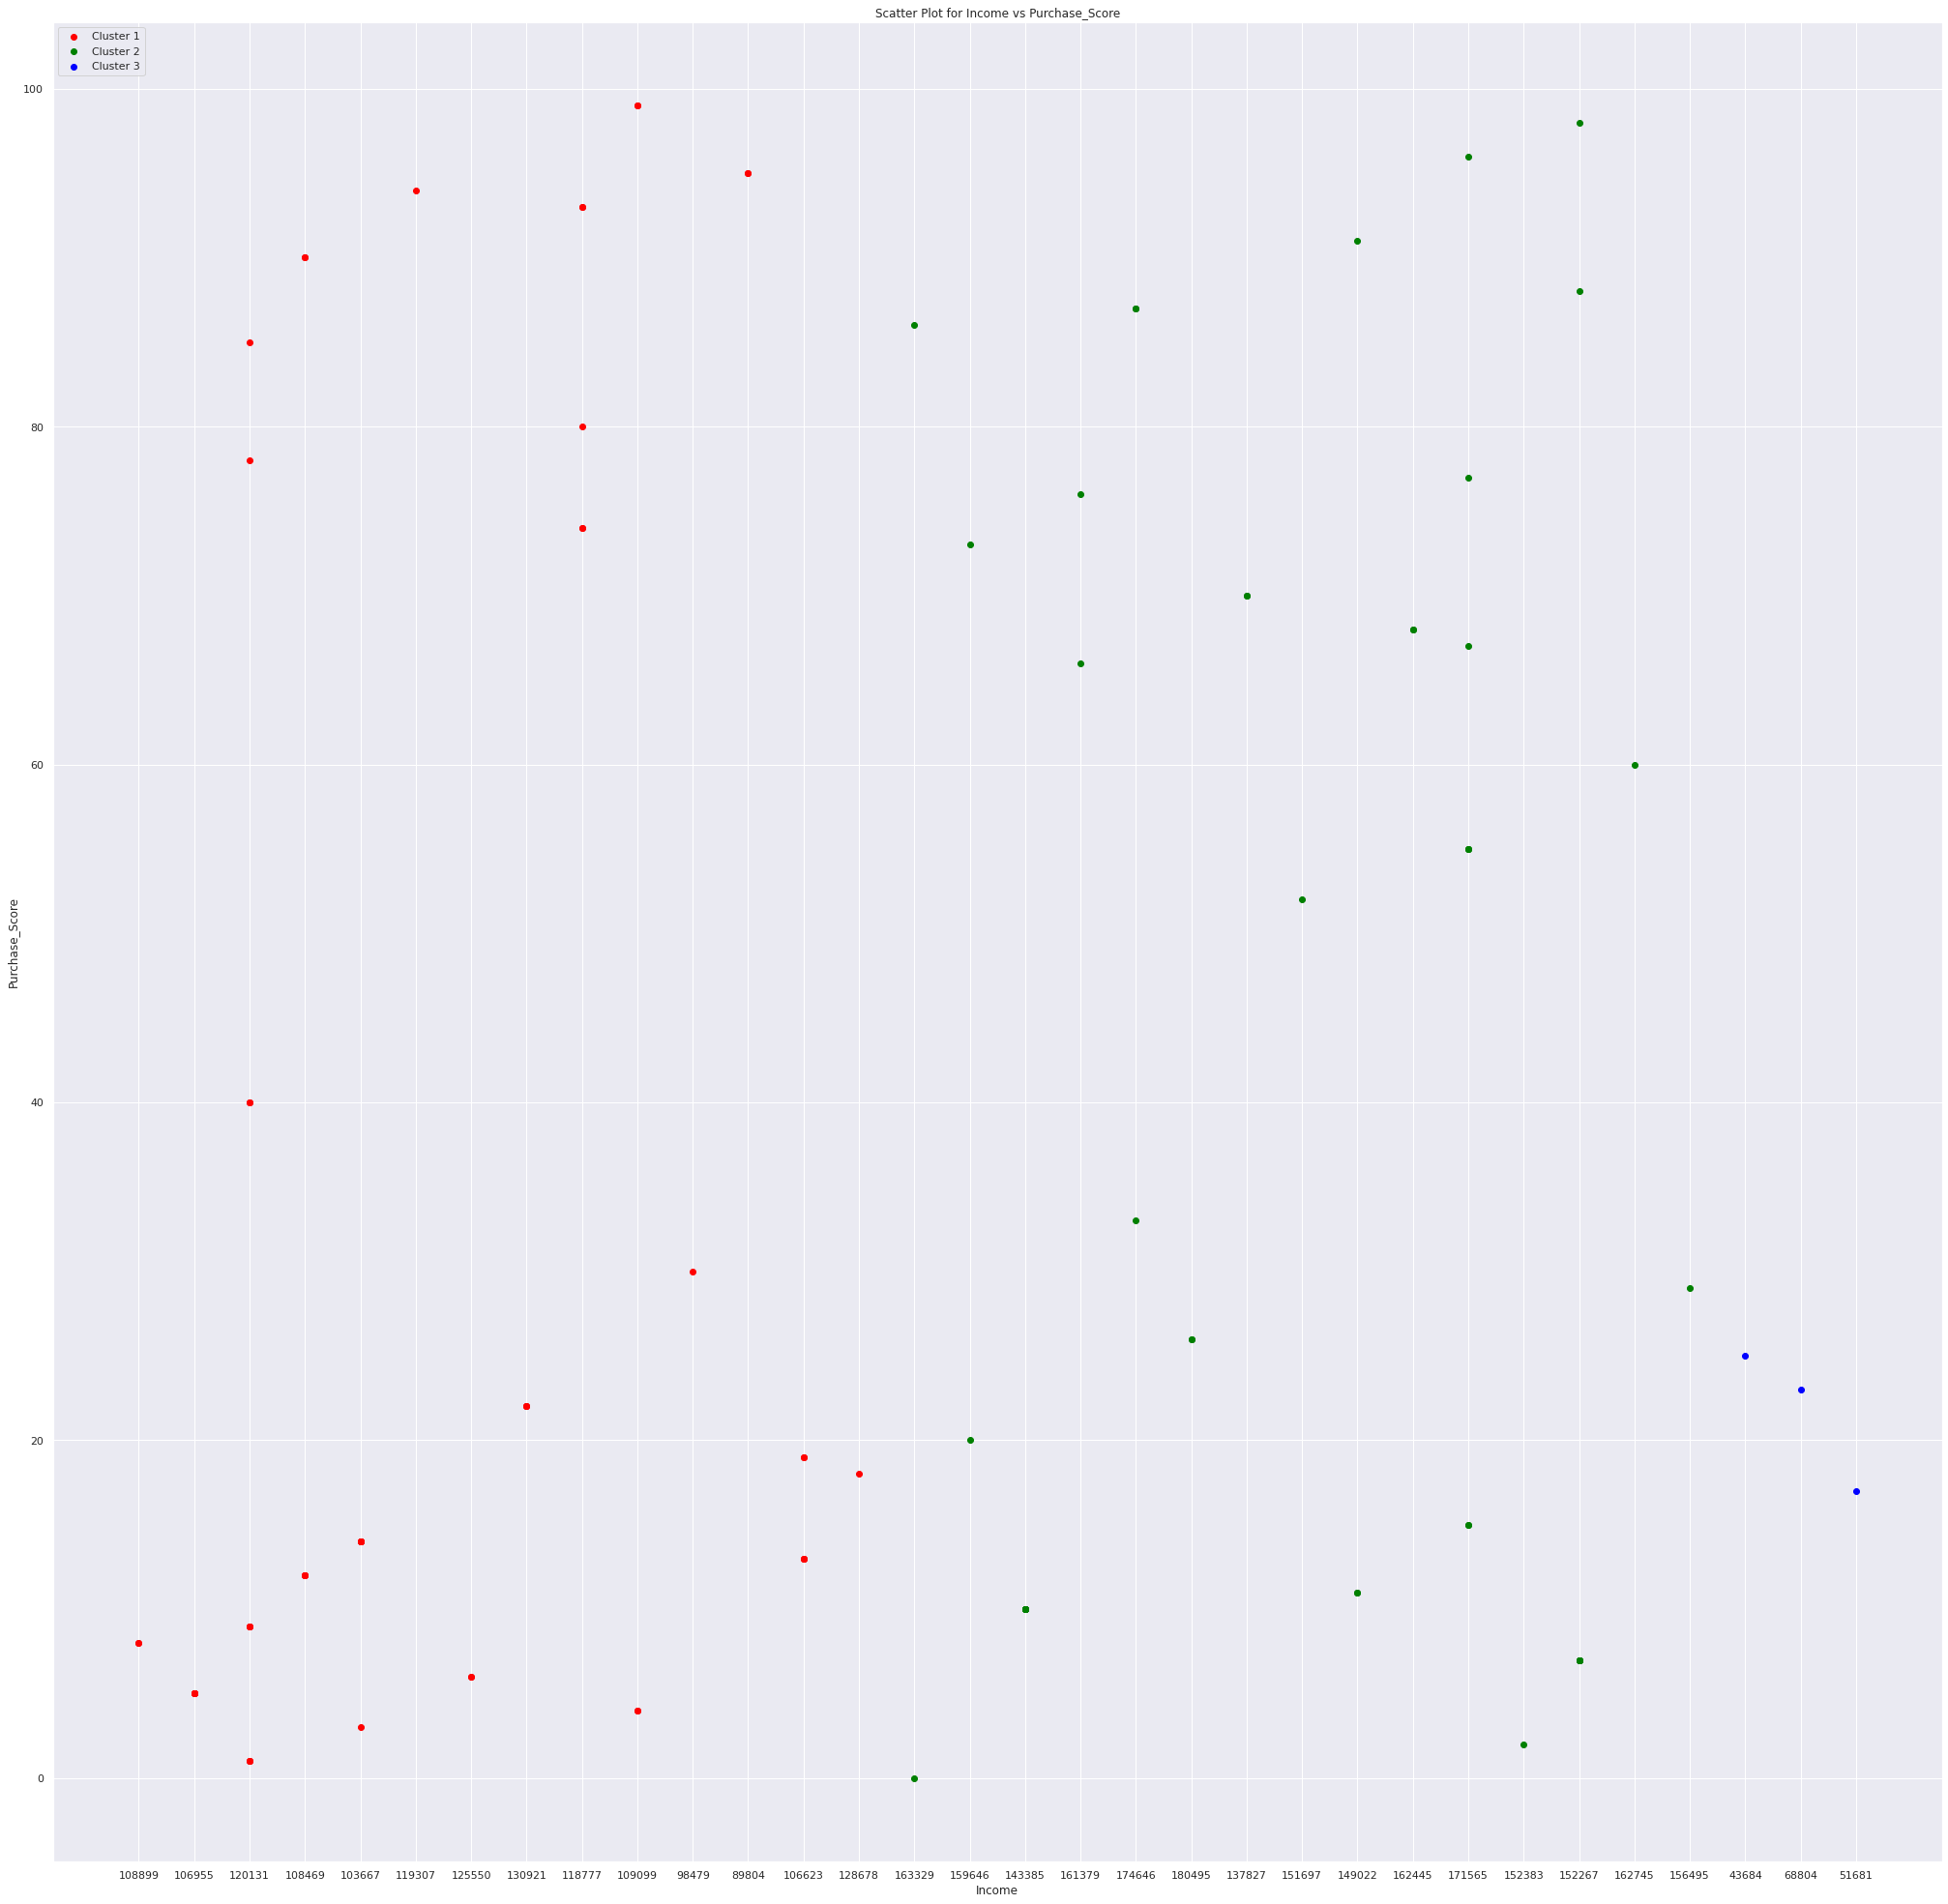

In [27]:
plt.figure(figsize=(35,35))
plt.scatter(df0['Income'],df0['Purchase_Score'],color='red')
plt.scatter(df1['Income'],df1['Purchase_Score'],color='green')
plt.scatter(df2['Income'],df2['Purchase_Score'],color='blue')
plt.title('Scatter Plot for Income vs Purchase_Score')
plt.xlabel('Income')
plt.ylabel('Purchase_Score')
plt.legend(labels=('Cluster 1','Cluster 2','Cluster 3'),loc='upper left')
plt.savefig('Plot F')
plt.show()

In [28]:
scaler=MinMaxScaler()
scaler.fit(fin_df[['Purchase_Score']])
fin_df['Purchase_Score']=scaler.transform(fin_df[['Purchase_Score']])
scaler.fit(fin_df[['Income']])
fin_df['Income']=scaler.transform(fin_df[['Income']])

In [29]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(fin_df[['Income','Purchase_Score']])
y_pred

array([1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0], dtype=int32)

In [30]:
fin_df['Clusters']=y_pred
fin_df

,ID,Income,Purchase_Score,Clusters
0,108899,0.476680,0.080808,1
1,106955,0.462470,0.050505,1
2,163329,0.874528,0.000000,2
3,120131,0.558778,0.090909,1
4,108469,0.473536,0.909091,0
...,...,...,...,...
96,143385,0.728750,0.101010,2
97,109099,0.478141,1.000000,0
98,103667,0.438437,0.141414,1
99,108469,0.473536,0.909091,0


## 8. Predicting final clusters

In [31]:
fin_df['Clusters'].unique()

array([1, 2, 0], dtype=int32)

In [32]:
km.cluster_centers_

array([[0.71677925, 0.8034632 ],
       [0.46100697, 0.1229798 ],
       [0.79578396, 0.13947164]])

In [39]:
freezed_centroids=km.cluster_centers_

In [33]:
df0=fin_df[fin_df.Clusters==0]
df1=fin_df[fin_df.Clusters==1]
df2=fin_df[fin_df.Clusters==2]
# df2=fin_df[fin_df.Clusters==3]

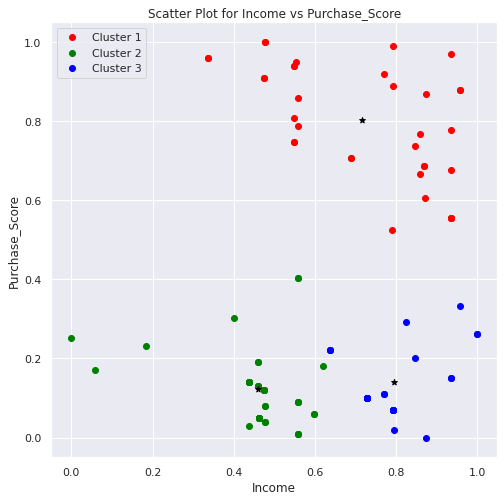

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(df0['Income'],df0['Purchase_Score'],color='red')
plt.scatter(df1['Income'],df1['Purchase_Score'],color='green')
plt.scatter(df2['Income'],df2['Purchase_Score'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black',label='centroid')
plt.title('Scatter Plot for Income vs Purchase_Score')
plt.xlabel('Income')
plt.ylabel('Purchase_Score')
plt.legend(labels=('Cluster 1','Cluster 2','Cluster 3'),loc='upper left')
plt.savefig('Plot G')
plt.show()

## 9. Calculating Sum of Squared Error

In [35]:
sse=[]
for i in range(1,10):
  km1=KMeans(n_clusters=i)
  km1.fit(fin_df[['Income','Purchase_Score']])
  sse.append(km1.inertia_)
print(sse)

[15.920153069419607, 5.179641068201802, 3.4093150144227016, 2.1162214391898213, 1.6000398887223213, 1.2950877068544822, 1.0511427856714755, 0.7917755508823072, 0.646082799877745]


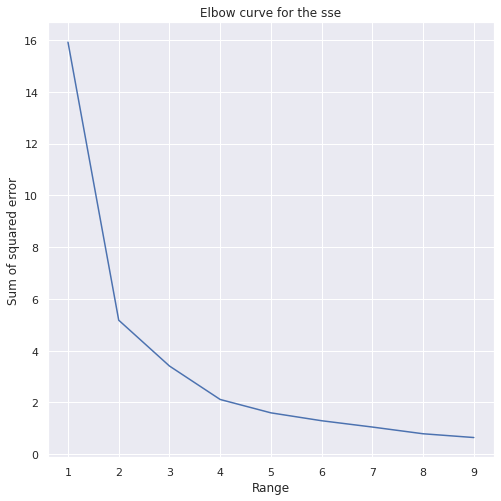

In [36]:
plt.figure(figsize=(8,8))
plt.xlabel('Range')
plt.ylabel('Sum of squared error')
plt.title('Elbow curve for the sse')
plt.plot(range(1,10),sse)
plt.savefig('Plot H')
plt.show()

## 10. Predicting and displaying results

In [37]:
income_sample=175998
sample_score=44
new_arr=[int(i) for i in arr_income if i!='Income']
new_arr.sort()
min_inc=new_arr[0]
max_inc=new_arr[len(new_arr)-1]
inc_minmax=(income_sample-min_inc)/(max_inc-min_inc)
score_minmax=sample_score/100
print(km.predict([[inc_minmax,score_minmax]])[0])
print('Thus the income 175998 and the purchase score of 44 belong to cluster 1 or Group 2')

1
Thus the income 175998 and the purchase score of 44 belong to cluster 1 or Group 2


## 11. Writing the pickle file

In [40]:
import pickle
pickle.dump(freezed_centroids, open('model.pkl','wb'))